# TP 1 : Linear regression

## Imports

In [225]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from scipy.stats import t
from mpl_toolkits.mplot3d import Axes3D

## Q1 

Import the data from the file “invest.txt” and print them in a readable form, e.g. a table containing
first 5 observations.


In [226]:
# Load the data
data = pd.read_csv('invest.txt', sep=" ")

#Show the first 5 rows of the data
data.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


## Q2 

Plot the data with Gross National Product (GNP, column “gnp”) being the abscissa and Investment
(column “invest”) being the ordinate.

**NOTE** : When working with monetary data, one often resorts to a logarithm transform to account for inequality of scale. First, transform the two above mentioned columns, GNP and Investment, via logarithm ; further in this exercise we will be working with these columns log-transformed. In Steps 3–6,
all the calculations should be done with elementary arithmetic and not involving existing libraries
for running linear regression.

In [227]:
# Logarithm transformation
x = np.log(data['gnp'])
Y = np.log(data['invest'])

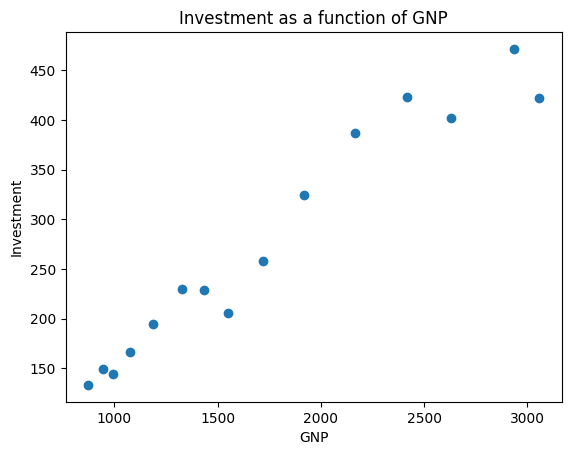

In [228]:
#Plot the data
plt.scatter(data['gnp'], data['invest'])
plt.title('Investment as a function of GNP')
plt.xlabel('GNP')
plt.ylabel('Investment')
plt.show()


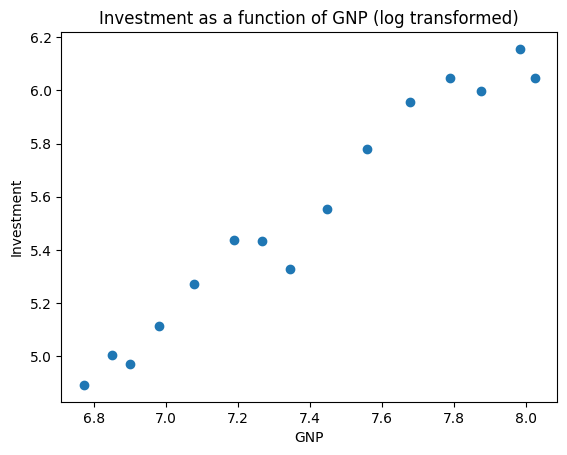

In [229]:
#Plot the data
plt.scatter(x, Y)
plt.title('Investment as a function of GNP (log transformed)')
plt.xlabel('GNP')
plt.ylabel('Investment')
plt.show()

## Q3 

For the linear regression of Investment on GNP, estimate the intercept and the slope and their
standard deviations, as well as the determination coefficient for the ordinary least squares. Output
them in a readable form.

In [230]:
n = len(x)
x_bar = np.mean(x)
Y_bar = np.mean(Y)

#Calculate the coefficients
b1 = np.sum((x - x_bar)*(Y - Y_bar))/np.sum((x - x_bar)**2)
b0 = Y_bar - b1*x_bar

#Variance
sigma_2 = np.sum((Y - b0 - b1*x)**2)/(n-2)
var_b0 = sigma_2*(1/n + x_bar**2/np.sum((x - x_bar)**2))
var_b1 = sigma_2/np.sum((x - x_bar)**2)

#Standard deviation
sigma_b0 = np.sqrt(var_b0)
sigma_b1 = np.sqrt(var_b1)

#Determination coefficient
R2 = np.sum((b0 + b1*x - Y_bar)**2)/np.sum((Y - Y_bar)**2)

print('Estimated coefficients')
print('b0 = {:.5f} with standard deviation {:.5f}'.format(b0, sigma_b0))
print('b1 = {:.5f} with standard deviation {:.5f}'.format(b1, sigma_b1))
print('Determination coefficient')
print('R² = {:.5f}'.format(R2))



Estimated coefficients
b0 = -1.96359 with standard deviation 0.40955
b1 = 1.01528 with standard deviation 0.05538
Determination coefficient
R² = 0.96276


## Q4

Test the significance of the slope using the Student-t test. Report the value of the test statistic and
the p-value.

In [231]:
#Quantiles of the t-distribution
alpha = 0.05
q = t.ppf(1 - alpha/2, n-2)


# t-test slope
test_slope = b1/sigma_b1
p_value = 2*(1 - t.cdf(test_slope, n-2))

test = 'Rejected' if np.abs(test_slope) > q else 'Not Rejected'

print('t-test')
print('t = {:.5f}'.format(test_slope))
print('p-value = {:.5e}'.format(p_value))
print('The null hypothesis H0=0 is {}'.format(test))



t-test
t = 18.33198
p-value = 1.13637e-10
The null hypothesis H0=0 is Rejected


## Q5

For the GNP value 1000, estimate the necessary Investment, provide confidence and prediction
intervals for the 90% level.

In [232]:
alpha = 0.1

#Transform the data
x0 = np.log(1000)

#Prediction
y0 = b0 + b1*x0

#Confidence interval
q = t.ppf(1-alpha/2, n-2)
CI = q*np.sqrt(sigma_2)*np.sqrt(1/n + (x0 - x_bar)**2/np.sum((x - x_bar)**2))
PI = q*np.sqrt(sigma_2)*np.sqrt(1 + 1/n + (x0 - x_bar)**2/np.sum((x - x_bar)**2))

print('T-test')
print('t quantile = {:.5f}'.format(q))
print('Prediction')
print('y0 = {:.5f}'.format(np.exp(y0)))

print('Confidence interval')
print('CI = [{:.5f}, {:.5f}]'.format(np.exp(y0 - CI), np.exp(y0 + CI)))
print('Prediction interval')
print('PI = [{:.5f}, {:.5f}]'.format(np.exp(y0 - PI), np.exp(y0 + PI)))

T-test
t quantile = 1.77093
Prediction
y0 = 155.97943
Confidence interval
CI = [146.67553, 165.87349]
Prediction interval
PI = [132.00239, 184.31168]


## Q6

On a plot with logarithmic axes (GNP as abscissa and Investment as ordinate), plot the data, the
estimated regression line, the confidence and prediction intervals for all values of log(GNP) between
its minimum and maximum in the data set.

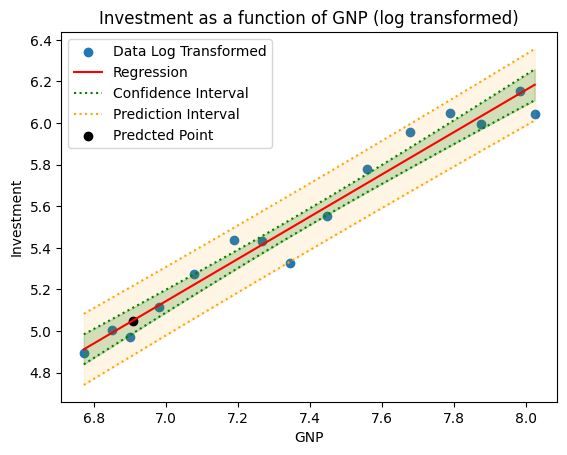

In [233]:

#Confidence Interval for all the data
alpha = 0.1
q = t.ppf(1-alpha/2, n-2)
y_pred = b0 + b1*x

CI = []
PI = []

for i in range(n):
    ci = q*np.sqrt(sigma_2)*np.sqrt(1/n + (x[i] - x_bar)**2/np.sum((x - x_bar)**2))
    pi = q*np.sqrt(sigma_2)*np.sqrt(1 + 1/n + (x[i] - x_bar)**2/np.sum((x - x_bar)**2))
    CI.append([(y_pred[i] - ci), (y_pred[i] + ci)])
    PI.append([(y_pred[i] - pi), (y_pred[i] + pi)])

CI_lower = pd.Series([subarray[0] for subarray in CI])
CI_upper = pd.Series([subarray[1] for subarray in CI])
PI_lower = pd.Series([subarray[0] for subarray in PI])
PI_upper = pd.Series([subarray[1] for subarray in PI])

#Plot the data
plt.scatter(x, Y, label='Data Log Transformed')
plt.plot(x, y_pred, color='red', label='Regression')
plt.plot(x, CI_lower, color='green', label='Confidence Interval', linestyle='dotted')
plt.plot(x, CI_upper, color='green' , linestyle='dotted')
plt.fill_between(x, CI_lower, CI_upper, color='green', alpha=0.2)
plt.plot(x, PI_lower, color='orange', label='Prediction Interval', linestyle='dotted')
plt.plot(x, PI_upper, color='orange', linestyle='dotted')
plt.fill_between(x, PI_lower, PI_upper, color='orange', alpha=0.1)

#Plot the prediction
plt.scatter(x0, y0, color='black', label='Predcted Point')

plt.title('Investment as a function of GNP (log transformed)')
plt.xlabel('GNP')
plt.ylabel('Investment')
plt.legend()
plt.show()



## Q7

Estimate the intercept, the slope, and the determination coefficient and predict the necessary Investment for the GNP value 1000 using existing functionality. The class LinearRegression() from
sklearn.linear_model is suggested but not obligatory ; any other available implementation of
the linear regression can be used instead. Report the estimated values and make sure that those
calculated ‘by hand’ (Steps 3 and 5) coincide with the ones obtained using existing implementation.


In [234]:
sklearn_reg = linear_model.LinearRegression()
sklearn_reg.fit(x.values.reshape(-1,1), Y)

print('Estimated coefficients')
print('b0 = {:.5f}'.format(sklearn_reg.intercept_))
print('b1 = {:.5f}'.format(sklearn_reg.coef_[0]))

print('Determination coefficient')
print('R² = {:.5f}'.format(sklearn_reg.score(x.values.reshape(-1,1), Y.values.reshape(-1,1))))

y0 = np.exp(sklearn_reg.predict(np.log(1000).reshape(-1,1))[0])
print('Prediction')
print('y0 = {:.5f}'.format(y0))

Estimated coefficients
b0 = -1.96359
b1 = 1.01528
Determination coefficient
R² = 0.96276
Prediction
y0 = 155.97943


## Q8

On a plot with logarithmic axes (GNP as abscissa and Investment as ordinate), plot the data, the
regression line and the predicted point (in a different color). The graphic should coincide with the
corresponding elements from the one in Step 6.

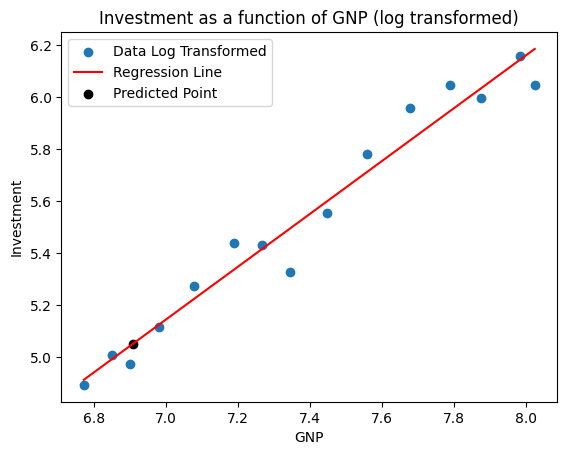

In [235]:
#Plot the data with the regression line scikit-learn
plt.scatter(x, Y, label='Data Log Transformed')
plt.plot(x, sklearn_reg.predict(x.values.reshape(-1,1)), color='red', label='Regression Line')

#plot predicted point
plt.scatter(np.log(1000), np.log(y0), color='black', label='Predicted Point')

plt.title('Investment as a function of GNP (log transformed)')
plt.xlabel('GNP')
plt.ylabel('Investment')
plt.legend()
plt.show()



**NOTE** : Further, consider an additional explanatory variable, namely Interest (column “interest”, without a
logarithmic transform). In Steps 9–12, all the calculations should be done with elementary arithmetic and not involving existing libraries for running linear regression. (Use function inv from
numpy.linalg for inversion of a matrix (“ two-dimensional numpy-array) and function eig from
the same package for calculating its eigenvalues.)

## Q9

For the linear regression of Investment on GNP and Interest, compute the associated Gram matrix.
Is it of full rank ?

In [236]:
#Gram Matrix
x_m = np.array([np.ones(n), x, data['interest']]).T
gram = x_m.T @ x_m/n
eigv = np.linalg.eigh(gram)


print('Eigenvalues of the Gram Matrix ')
print(eigv[0])

#Is gram invertible
print('Is the Gram matrix invertible? {}'.format(np.linalg.det(gram) != 0))
print('Is the Gram matrix invertible? {}'.format(np.linalg.matrix_rank(gram) == 3))
print('Is the Gram matrix invertible? {}'.format((eigv[0]>0).all()))

Eigenvalues of the Gram Matrix 
[1.21579798e-03 2.74760242e+00 1.15858127e+02]
Is the Gram matrix invertible? True
Is the Gram matrix invertible? True
Is the Gram matrix invertible? True


In [237]:
print(gram)

[[ 1.          7.38352141  7.45266667]
 [ 7.38352141 54.68323179 55.94590287]
 [ 7.45266667 55.94590287 62.92371333]]


## Q10

For the linear regression of Investment on GNP and Interest, estimate the three regression coefficients and their standard deviations, as well as the determination coefficient for the ordinary least
squares. Additionally, test significance of each coefficient using the Student-t test. Report the regression coefficients, corresponding to them p-values, and the determination coefficient in a readable
form. Discuss significance of the estimated regression coefficients.

In [238]:
gram_inv = np.linalg.inv(gram*n)

#Calculate the coefficients
b = gram_inv @ x_m.T @ Y

#Variance
sigma_2 =  np.sum((Y - x_m @ b)**2)/(n-3)

#Standard deviation
sigma_b0 = np.sqrt(sigma_2*gram_inv[0,0])
sigma_b1 = np.sqrt(sigma_2*gram_inv[1,1])
sigma_b2 = np.sqrt(sigma_2*gram_inv[2,2])

#Determination coefficient
R2 = np.sum((x_m @ b - Y_bar)**2)/np.sum((Y - Y_bar)**2)

#Quantiles of the t-distribution
alpha = 0.05
q = t.ppf(1 - alpha/2, n-3)

# t-test 
test_b0 = b[0]/sigma_b0
p_value_b0 = 2*(1 - t.cdf(test_b0, n-3))
test_b1 = b[1]/sigma_b1
p_value_b1 = 2*(1 - t.cdf(test_b1, n-3))
test_b2 = b[2]/sigma_b2
p_value_b2 = 2*(1 - t.cdf(test_b2, n-3))


print('Estimated coefficients')
print('b0 = {:.5f} with sd {:.5f}'.format(b[0], sigma_b0))
print('b1 = {:.5f} with sd {:.5f}'.format(b[1], sigma_b1))
print('b2 = {:.5f} with sd {:.5f}'.format(b[2], sigma_b2))

print('Determination coefficient')
print('R² = {:.5f}'.format(R2))

print('t-test')
print('t_b0 = {:.5f} p-value b0 {:.5f}'.format(test_b0, p_value_b0))
print('t_b1 = {:.5f} p-value b1 {:.5e}'.format(test_b1, p_value_b1))
print('t_b2 = {:.5f} p-value b2 {:.5f}'.format(test_b2, p_value_b2))



Estimated coefficients
b0 = -2.18045 with sd 0.66240
b1 = 1.05124 with sd 0.10206
b2 = -0.00653 with sd 0.01534
Determination coefficient
R² = 0.96331
t-test
t_b0 = -3.29175 p-value b0 1.99356
t_b1 = 10.30010 p-value b1 2.59952e-07
t_b2 = -0.42549 p-value b2 1.32199


## Q11

For the values of GNP “ 1000 and Interest “ 10, predict the log(Investment) and provide confident
and prediction intervals at the 99.9% level.

In [239]:
x0 = np.array([1, np.log(1000), 10])
alpha = 1 - 0.999
Y_pred = x0 @ b

#Confidence interval
q = t.ppf(1-alpha/2, n-3)
CI = q*np.sqrt(sigma_2)*np.sqrt(x0 @ gram_inv @ x0.T)

#Prediction interval
PI = q*np.sqrt(sigma_2)*np.sqrt(1 + x0 @ gram_inv @ x0.T)

print('Prediction')
print('y0 = {:.5f}'.format(np.exp(Y_pred)))
print('Confidence interval')
print('CI = [{:.5f}, {:.5f}]'.format(Y_pred - CI, Y_pred + CI))
print('Prediction interval')
print('PI = [{:.5f}, {:.5f}]'.format(Y_pred - PI, Y_pred + PI))



Prediction
y0 = 150.80441
Confidence interval
CI = [4.64018, 5.39178]
Prediction interval
PI = [4.47380, 5.55816]


## Q12

On a same 3D-plot with axes being log(GNP), Interest, and log(Invetment), draw data points, their
predictions, regression plane and surfaces of the 99.9% confidence intervals for each pair of values
of log(GNP) and Interest between their minimum and maximum.


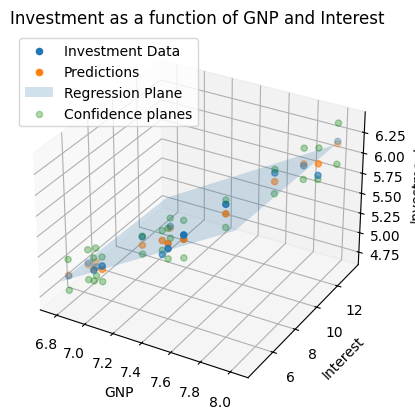

In [244]:
#Plot the data 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_m[:,1], x_m[:,2], Y, label='Investment Data')

#Predictions
preds = x_m @ b
ax.scatter(x_m[:,1], x_m[:,2], preds, label='Predictions')

#Regression plane
x1 = np.arange(np.min(x_m[:,1]), np.max(x_m[:,1]), 0.1)
x2 = np.arange(np.min(x_m[:,2]), np.max(x_m[:,2]), 0.1)
X1, X2 = np.meshgrid(x1, x2)

surface = b[0] + b[1]*X1 + b[2]*X2

ax.plot_surface(X1, X2, surface, alpha=0.2, label='Regression Plane')

#confidence planes
alpha = 1 - 0.999
q = t.ppf(1-alpha/2, n-3)
CI = []
PI = []
for i in range(n):
    ci = q*np.sqrt(sigma_2)*np.sqrt(x_m[i] @ gram_inv @ x_m[i].T)
    pi = q*np.sqrt(sigma_2)*np.sqrt(1 + x_m[i] @ gram_inv @ x_m[i].T)
    CI.append([(preds[i] - ci), (preds[i] + ci)])
    PI.append([(preds[i] - pi), (preds[i] + pi)])

CI_lower = pd.Series([subarray[0] for subarray in CI])
CI_upper = pd.Series([subarray[1] for subarray in CI])
PI_lower = pd.Series([subarray[0] for subarray in PI])
PI_upper = pd.Series([subarray[1] for subarray in PI])

ax.scatter(x_m[:,1], x_m[:,2], CI_lower, color='g', alpha=0.3, label='Confidence planes')
ax.scatter(x_m[:,1], x_m[:,2], CI_upper, color='g', alpha=0.3)

ax.set_title('Investment as a function of GNP and Interest')
ax.set_xlabel('GNP')
ax.set_ylabel('Interest')
ax.set_zlabel('Investment')
ax.legend()
plt.show()

## Q13

Estimate the regression and determination coefficients and predict the necessary log(Investment) for
GNP “ 1000 and Interest “ 10 using existing functionality. Again, the class LinearRegression()
from sklearn.linear_model is suggested but not obligatory ; any other available implementation
of the linear regression can be used instead. Report the estimated values and make sure that those
calculated ‘by hand’ (Steps 10 and 11) coincide with the ones obtained using existing implementation.


In [241]:
sklearn_reg = linear_model.LinearRegression(fit_intercept=False)
sklearn_reg.fit(x_m, Y)

print('Estimated coefficients')
print('b0 = {:.5f}'.format(sklearn_reg.coef_[0]))
print('b1 = {:.5f}'.format(sklearn_reg.coef_[1]))
print('b2 = {:.5f}'.format(sklearn_reg.coef_[2]))

print('Determination coefficient')
print('R² = {:.5f}'.format(sklearn_reg.score(x_m, Y)))

y0 = np.exp(sklearn_reg.predict(np.array([1, np.log(1000), 10]).reshape(1,-1))[0])
print('Prediction')
print('y0 = {:.5f}'.format(y0))

Estimated coefficients
b0 = -2.18045
b1 = 1.05124
b2 = -0.00653
Determination coefficient
R² = 0.96331
Prediction
y0 = 150.80441
